# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é ilustrar o uso de praticamente a mesma rede desenvolvida para a classificação das flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.
As principais diferenças são:
- tipo do dado, agora imagem com muito atributos: 28 x 28 pixels
- número de amostras, muito maior, 60 mil
Neste exercício será possível a interpretação do significado dos parâmetros treinados

## Importação das bibliotecas

In [1]:
! pip install Pillow

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable

import torchvision

## Carregamento dos dados do MNIST

In [3]:
! git clone https://github.com/vcasadei/MNIST.git

Cloning into 'MNIST'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10 (from 1)
Receiving objects: 100% (10/10), 11.01 MiB | 17.95 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [4]:
!ls MNIST

processed  raw


In [5]:
dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos apenas 1000 amostras de treinamento.

In [6]:
x_train = x_train.float()

x_train = x_train / 255.

if True:
    n_samples_train = 1000

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 1000

Dimensões dos dados das imagens:    torch.Size([1000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Visualizando os dados

(np.float64(-0.5), np.float64(232.5), np.float64(87.5), np.float64(-0.5))

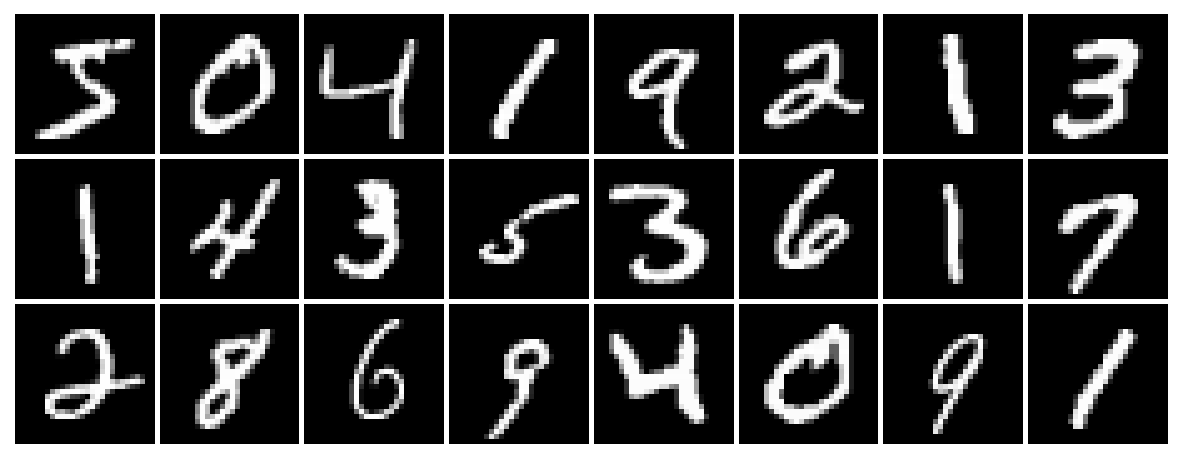

In [7]:
n_samples = 24

# cria um grid com as imagens
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(dim=1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')

### Visualizando uma imagem com o matplotlib

class: tensor(5)


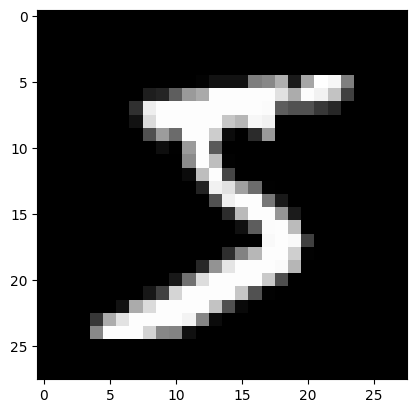

In [8]:
image  = x_train[0]
target = y_train[0]

plt.imshow(image.numpy(), cmap='gray')
print('class:', target)

## Modelo

In [9]:
model = torch.nn.Linear(28*28, 10) # 28*28 atributos de entrada e 10 neurônios na sáida

### Testando um predict com poucas amostras

In [10]:
xin = x_train[:5].view(-1,28*28)
score = model(Variable(xin))
score

tensor([[ 0.0265,  0.2495, -0.1509, -0.0568, -0.2747,  0.1191, -0.3722, -0.0677,
         -0.3305, -0.3289],
        [ 0.1199,  0.1402,  0.1308,  0.0551, -0.1957,  0.1557,  0.2675,  0.2569,
         -0.0850, -0.2002],
        [-0.0394,  0.0360,  0.0420,  0.1254,  0.0568, -0.0154, -0.0011, -0.0713,
         -0.0978,  0.1692],
        [ 0.0304, -0.0532, -0.1508,  0.0321, -0.2124, -0.2517,  0.0172, -0.1451,
          0.0963, -0.1673],
        [ 0.0128, -0.1589, -0.0108, -0.1417,  0.2725, -0.2036,  0.1975,  0.0150,
          0.1687, -0.0328]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [11]:
epochs = 100
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Visualização do grafo computacional da perda (loss)

In [12]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.6 MB/s eta 0:00:00
  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-3oo2q2hb
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz /tmp/pip-req-build-3oo2q2hb
  Resolved https://github.com/szagoruyko/pytorchviz to commit 5cf04c13e601366f6b9cf5939b5af5144d55b887
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=5036 sha256=0b88ea5295d892b703b188f4483df3c5864d9e82db1cd462abd420ffeef7c744
  Stored in directory: /tmp/pip-ephem-wheel-cache-g4hclsrd/wheels/63/59/c1/3342e0bca82db7c512109b8da472d40be5c95cca7ce5363332
Successfully built torchviz


In [13]:
from torchviz import make_dot, make_dot_from_trace
y_pred = model(Variable(x_train.view(-1,28*28)))
loss = criterion(y_pred, Variable(y_train))
loss


tensor(2.3011, grad_fn=<NllLossBackward0>)

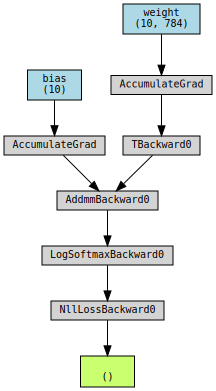

In [14]:
p = make_dot(loss, dict(model.named_parameters()))
p

### Laço de treinamento dos pesos

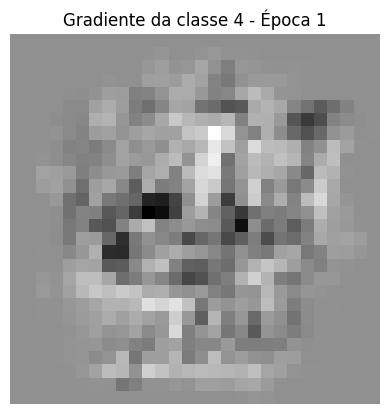

Epoch[1/100], Loss: 0.178460, Accuracy: 0.9660


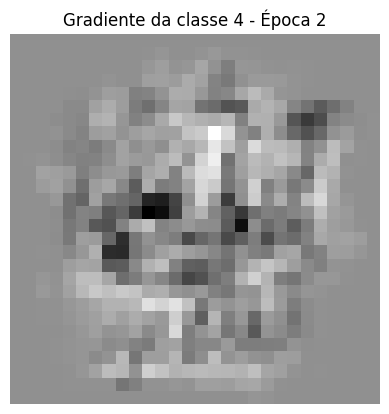

Epoch[2/100], Loss: 0.177886, Accuracy: 0.9660


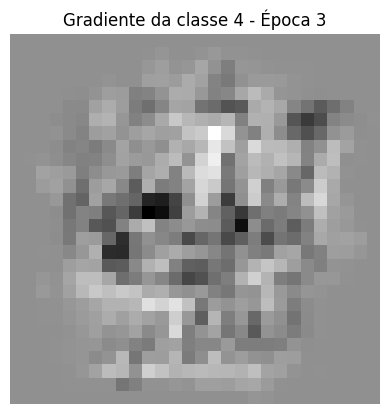

Epoch[3/100], Loss: 0.177315, Accuracy: 0.9660


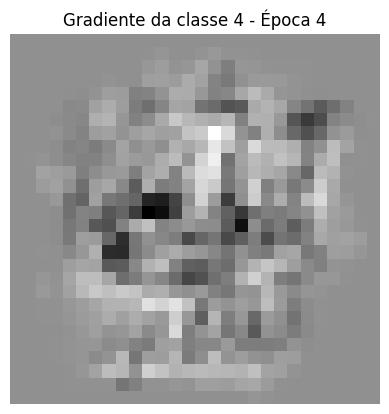

Epoch[4/100], Loss: 0.176748, Accuracy: 0.9660


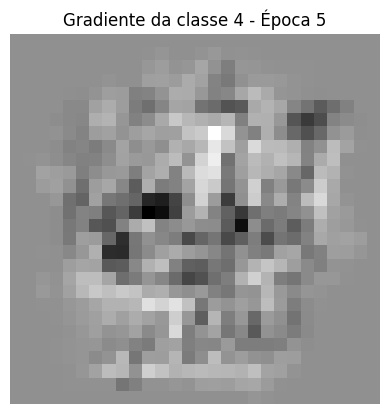

Epoch[5/100], Loss: 0.176184, Accuracy: 0.9660


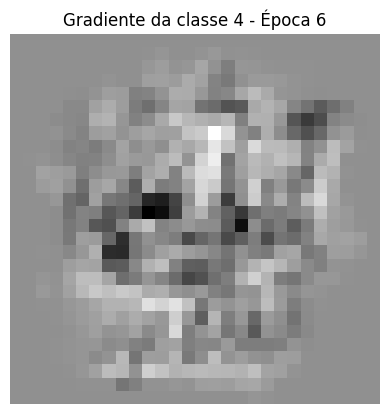

Epoch[6/100], Loss: 0.175623, Accuracy: 0.9660


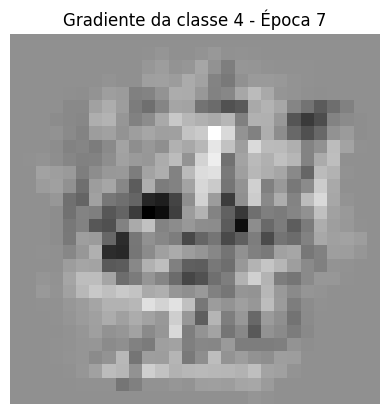

Epoch[7/100], Loss: 0.175067, Accuracy: 0.9660


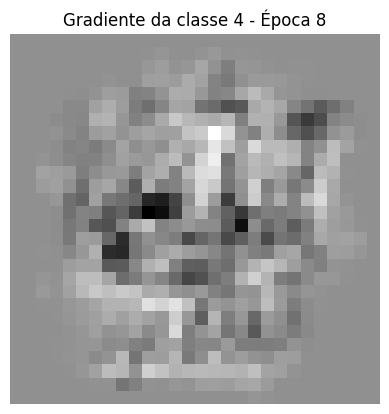

Epoch[8/100], Loss: 0.174513, Accuracy: 0.9660


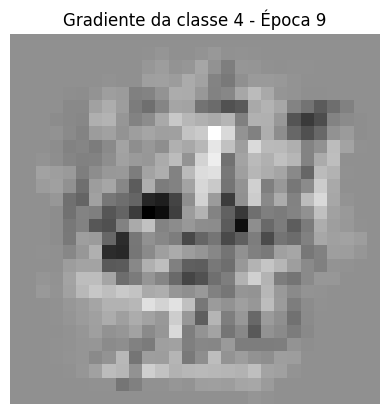

Epoch[9/100], Loss: 0.173963, Accuracy: 0.9660


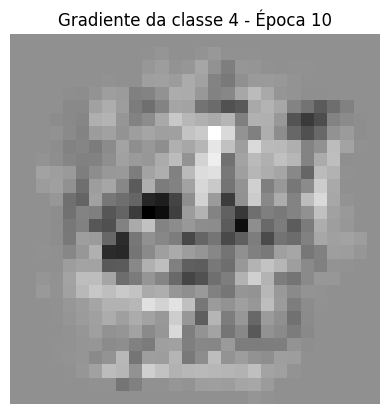

Epoch[10/100], Loss: 0.173416, Accuracy: 0.9660


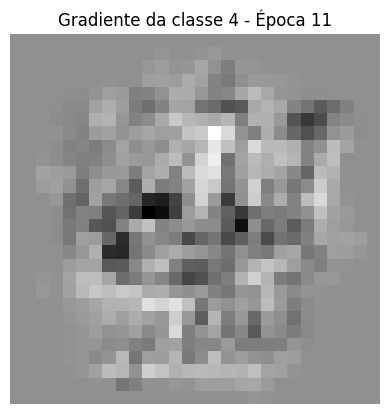

Epoch[11/100], Loss: 0.172872, Accuracy: 0.9660


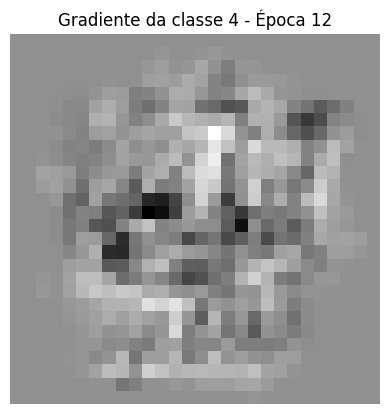

Epoch[12/100], Loss: 0.172332, Accuracy: 0.9670


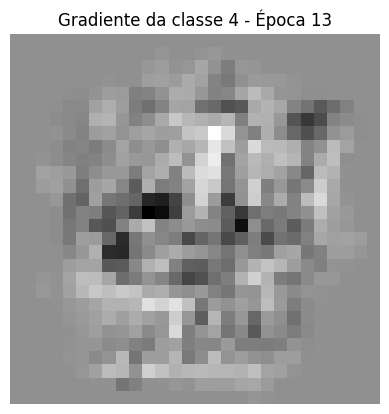

Epoch[13/100], Loss: 0.171794, Accuracy: 0.9670


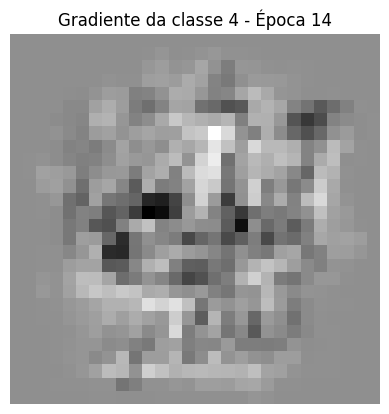

Epoch[14/100], Loss: 0.171260, Accuracy: 0.9670


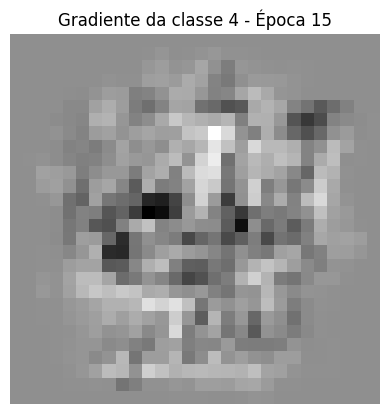

Epoch[15/100], Loss: 0.170729, Accuracy: 0.9680


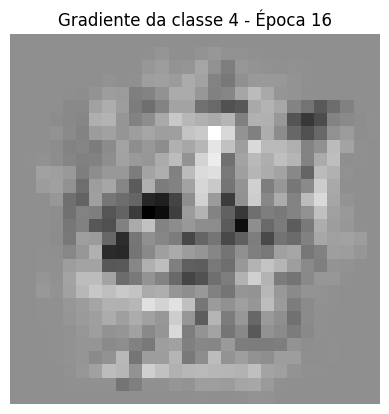

Epoch[16/100], Loss: 0.170202, Accuracy: 0.9680


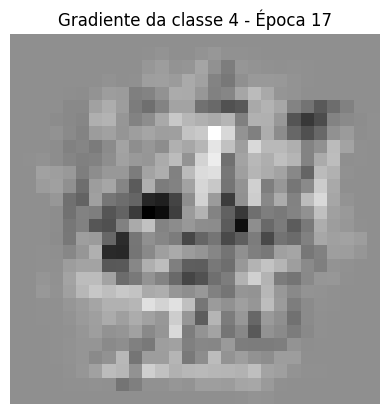

Epoch[17/100], Loss: 0.169677, Accuracy: 0.9680


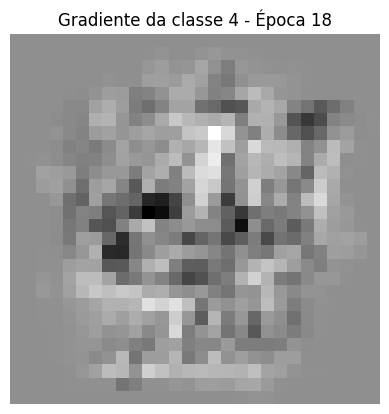

Epoch[18/100], Loss: 0.169155, Accuracy: 0.9680


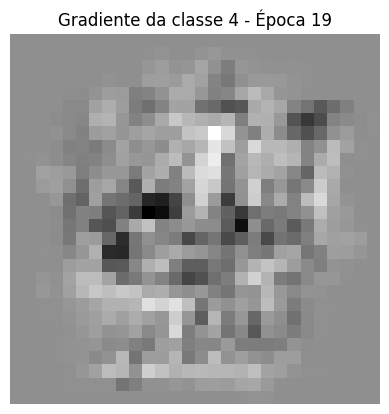

Epoch[19/100], Loss: 0.168637, Accuracy: 0.9690


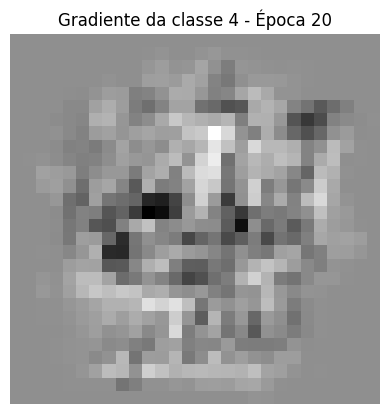

Epoch[20/100], Loss: 0.168121, Accuracy: 0.9690


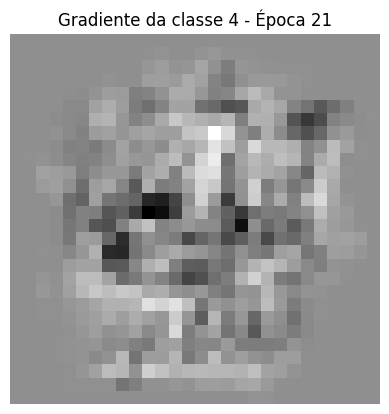

Epoch[21/100], Loss: 0.167608, Accuracy: 0.9690


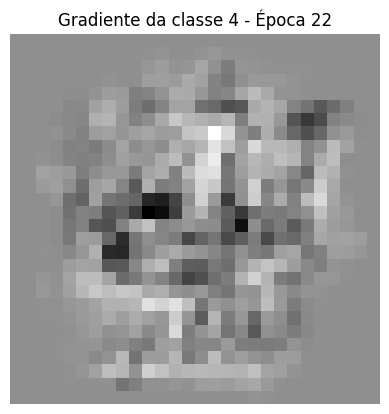

Epoch[22/100], Loss: 0.167098, Accuracy: 0.9690


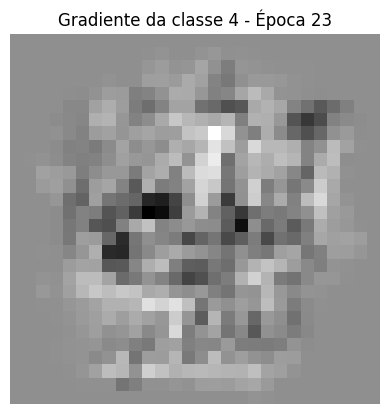

Epoch[23/100], Loss: 0.166592, Accuracy: 0.9690


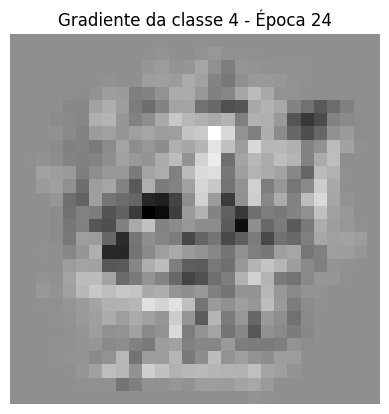

Epoch[24/100], Loss: 0.166088, Accuracy: 0.9690


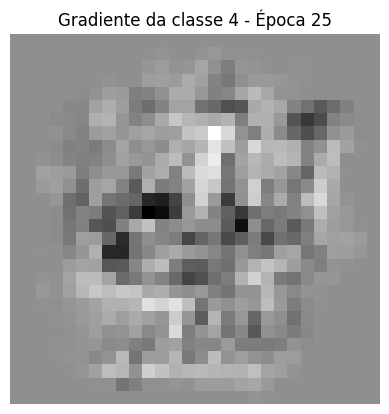

Epoch[25/100], Loss: 0.165587, Accuracy: 0.9690


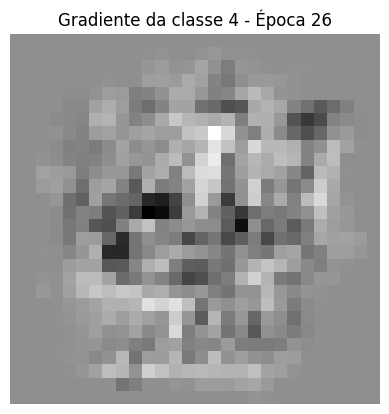

Epoch[26/100], Loss: 0.165088, Accuracy: 0.9690


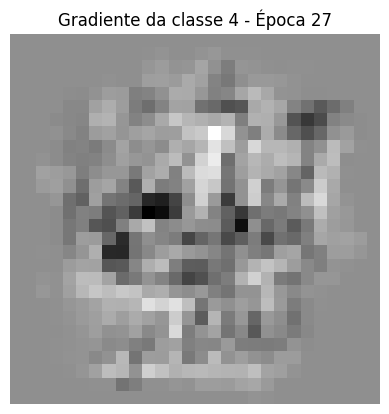

Epoch[27/100], Loss: 0.164593, Accuracy: 0.9690


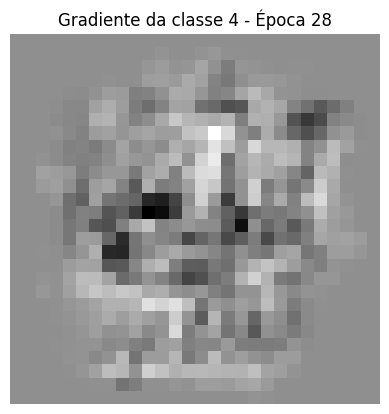

Epoch[28/100], Loss: 0.164100, Accuracy: 0.9690


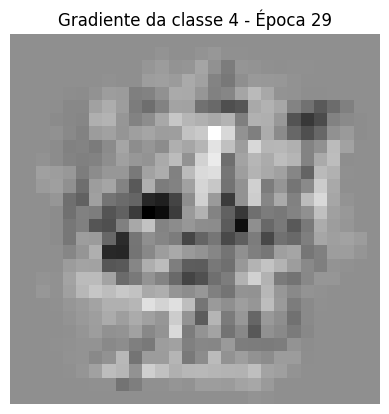

Epoch[29/100], Loss: 0.163610, Accuracy: 0.9700


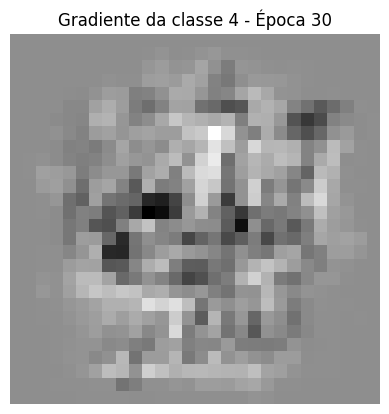

Epoch[30/100], Loss: 0.163123, Accuracy: 0.9700


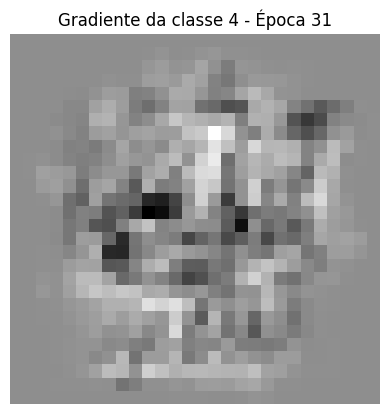

Epoch[31/100], Loss: 0.162639, Accuracy: 0.9710


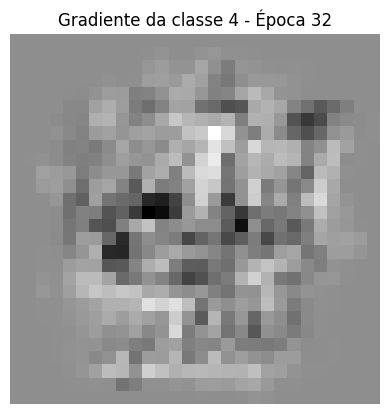

Epoch[32/100], Loss: 0.162157, Accuracy: 0.9710


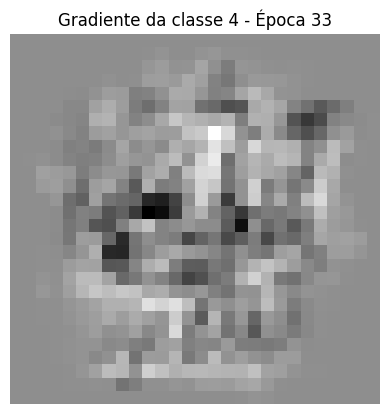

Epoch[33/100], Loss: 0.161678, Accuracy: 0.9710


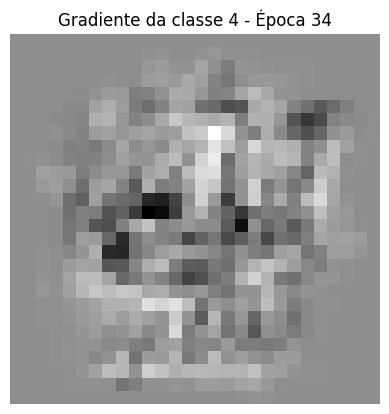

Epoch[34/100], Loss: 0.161201, Accuracy: 0.9710


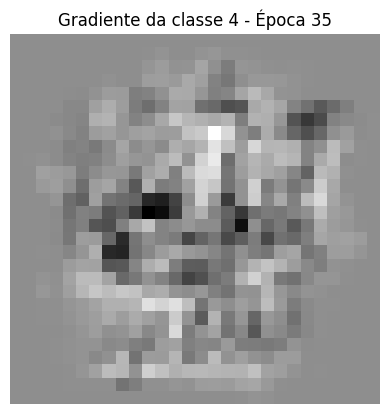

Epoch[35/100], Loss: 0.160727, Accuracy: 0.9710


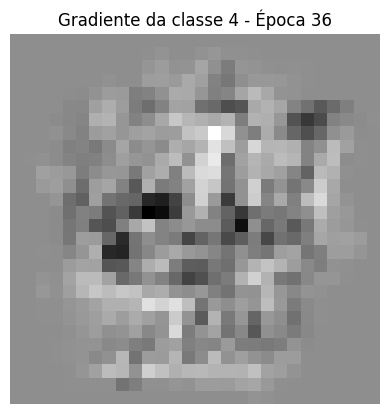

Epoch[36/100], Loss: 0.160256, Accuracy: 0.9710


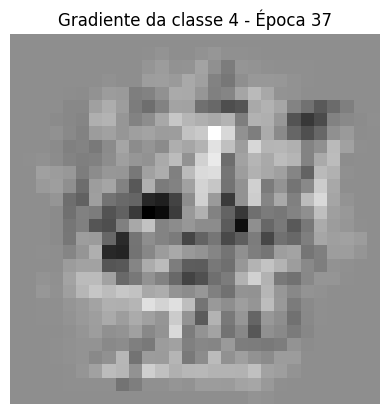

Epoch[37/100], Loss: 0.159787, Accuracy: 0.9710


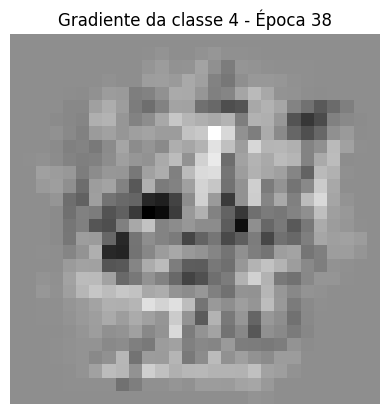

Epoch[38/100], Loss: 0.159321, Accuracy: 0.9710


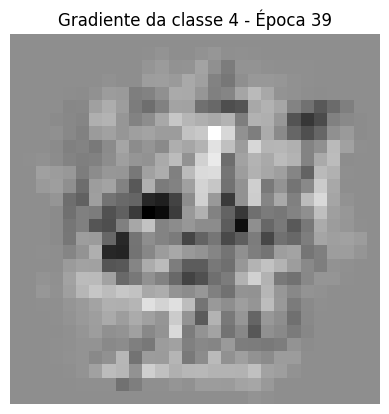

Epoch[39/100], Loss: 0.158857, Accuracy: 0.9720


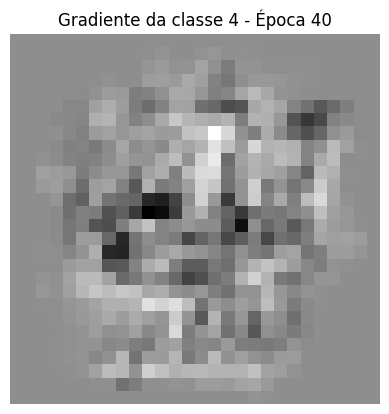

Epoch[40/100], Loss: 0.158396, Accuracy: 0.9720


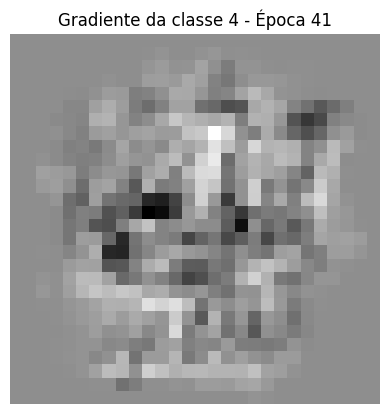

Epoch[41/100], Loss: 0.157937, Accuracy: 0.9720


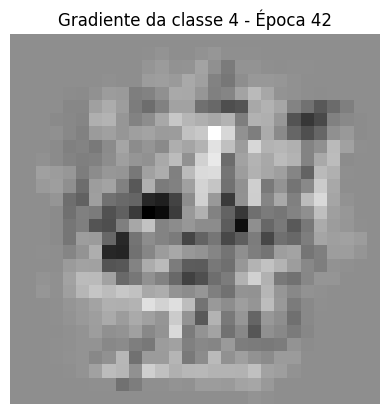

Epoch[42/100], Loss: 0.157481, Accuracy: 0.9730


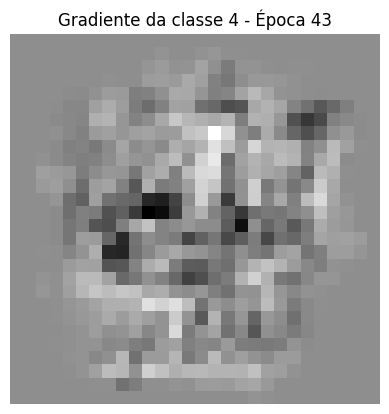

Epoch[43/100], Loss: 0.157027, Accuracy: 0.9730


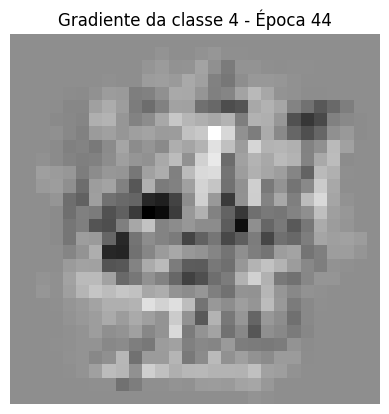

Epoch[44/100], Loss: 0.156576, Accuracy: 0.9730


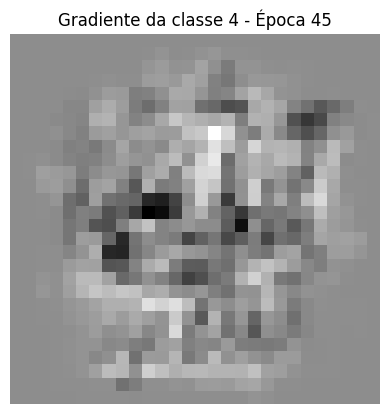

Epoch[45/100], Loss: 0.156127, Accuracy: 0.9730


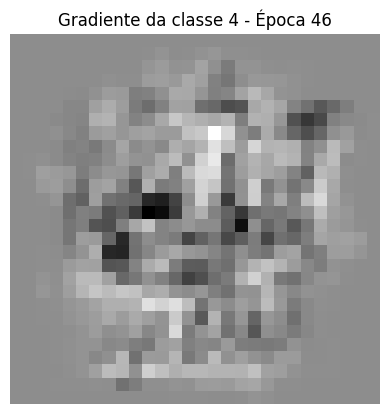

Epoch[46/100], Loss: 0.155680, Accuracy: 0.9730


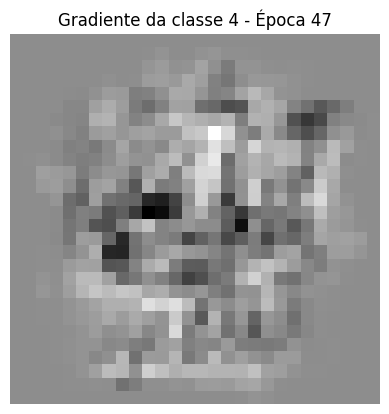

Epoch[47/100], Loss: 0.155236, Accuracy: 0.9730


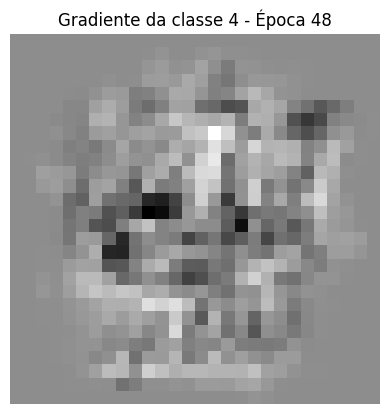

Epoch[48/100], Loss: 0.154794, Accuracy: 0.9740


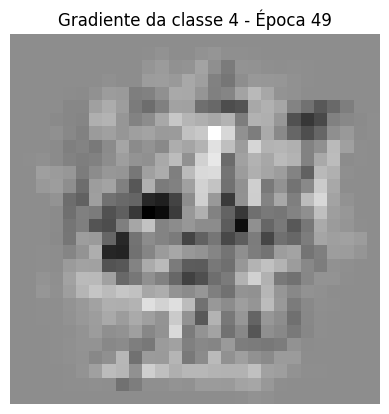

Epoch[49/100], Loss: 0.154354, Accuracy: 0.9740


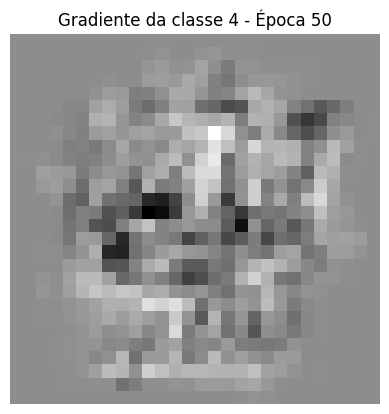

Epoch[50/100], Loss: 0.153917, Accuracy: 0.9740


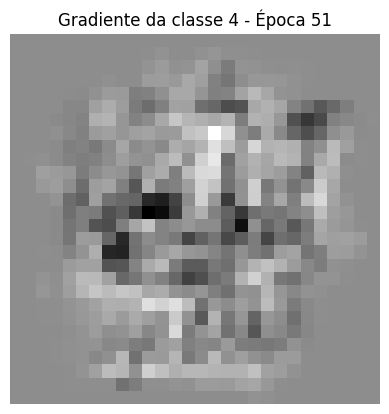

Epoch[51/100], Loss: 0.153482, Accuracy: 0.9740


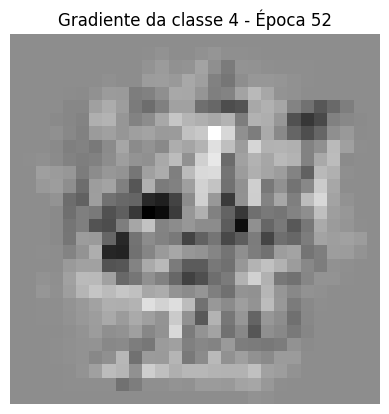

Epoch[52/100], Loss: 0.153049, Accuracy: 0.9740


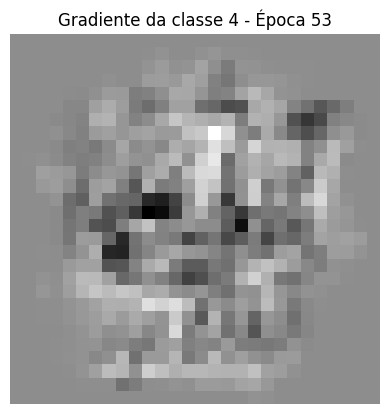

Epoch[53/100], Loss: 0.152618, Accuracy: 0.9740


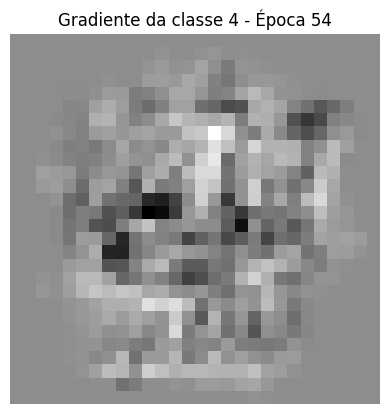

Epoch[54/100], Loss: 0.152190, Accuracy: 0.9740


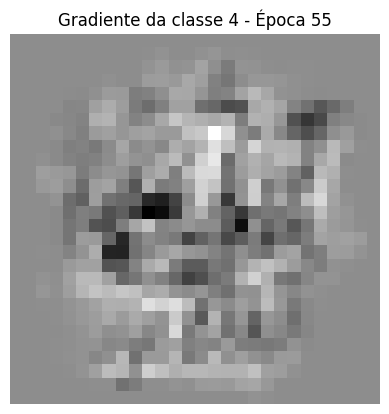

Epoch[55/100], Loss: 0.151764, Accuracy: 0.9740


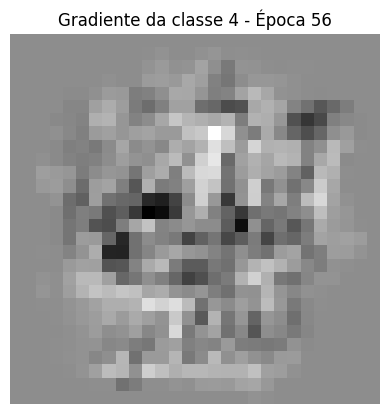

Epoch[56/100], Loss: 0.151340, Accuracy: 0.9740


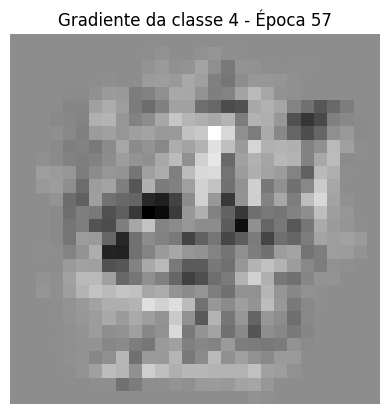

Epoch[57/100], Loss: 0.150918, Accuracy: 0.9740


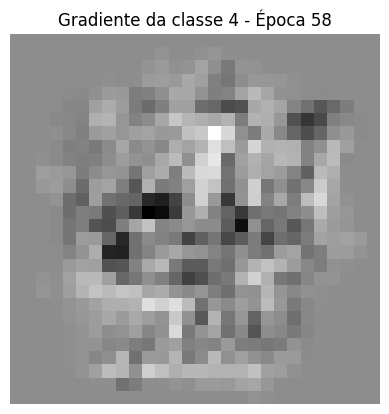

Epoch[58/100], Loss: 0.150498, Accuracy: 0.9740


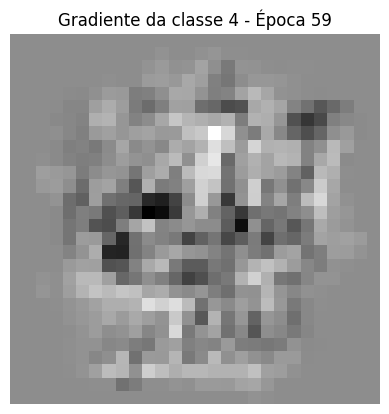

Epoch[59/100], Loss: 0.150081, Accuracy: 0.9740


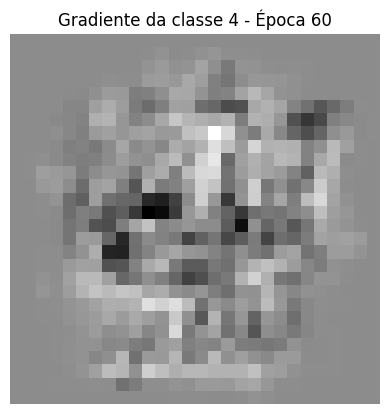

Epoch[60/100], Loss: 0.149665, Accuracy: 0.9740


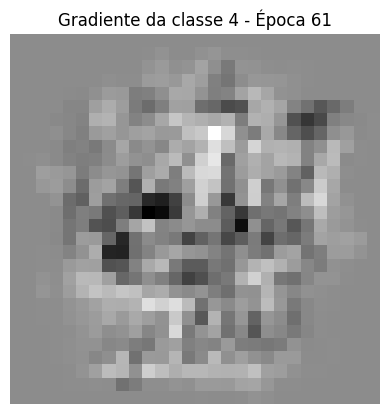

Epoch[61/100], Loss: 0.149252, Accuracy: 0.9740


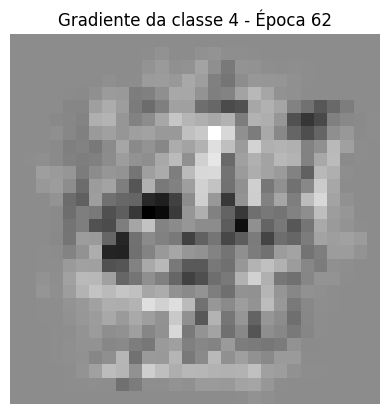

Epoch[62/100], Loss: 0.148840, Accuracy: 0.9740


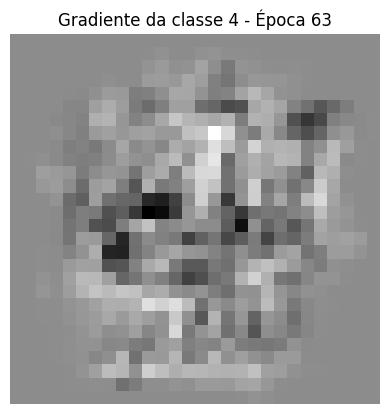

Epoch[63/100], Loss: 0.148431, Accuracy: 0.9740


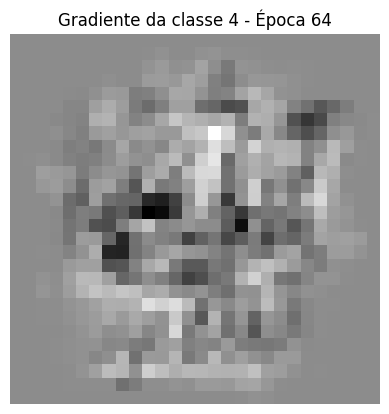

Epoch[64/100], Loss: 0.148024, Accuracy: 0.9740


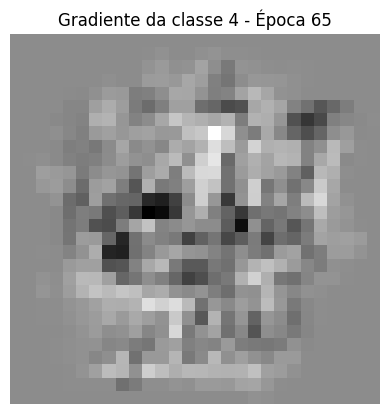

Epoch[65/100], Loss: 0.147619, Accuracy: 0.9740


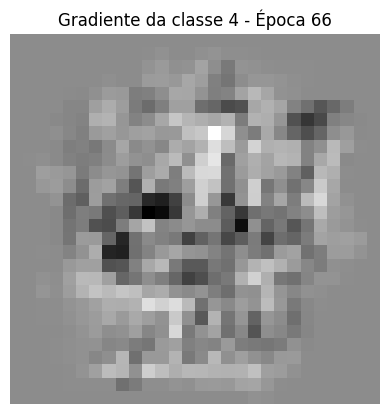

Epoch[66/100], Loss: 0.147216, Accuracy: 0.9740


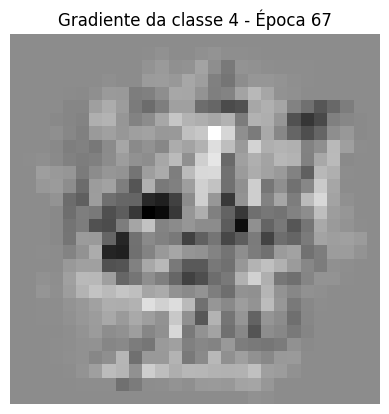

Epoch[67/100], Loss: 0.146815, Accuracy: 0.9750


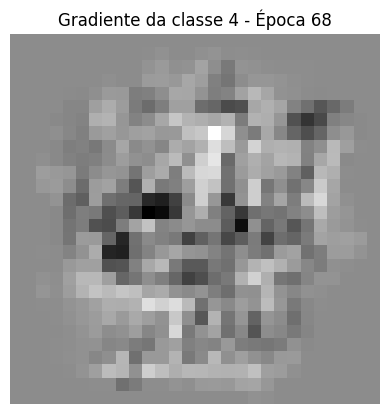

Epoch[68/100], Loss: 0.146416, Accuracy: 0.9760


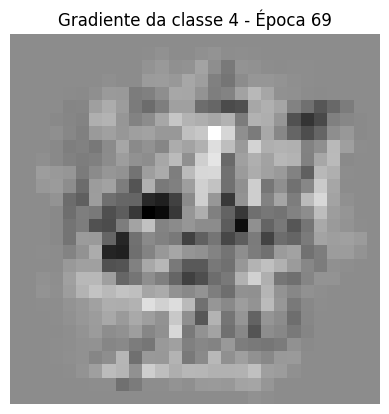

Epoch[69/100], Loss: 0.146019, Accuracy: 0.9760


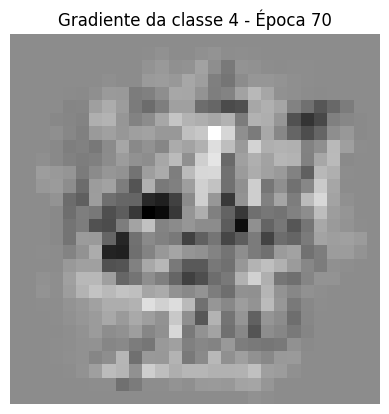

Epoch[70/100], Loss: 0.145623, Accuracy: 0.9760


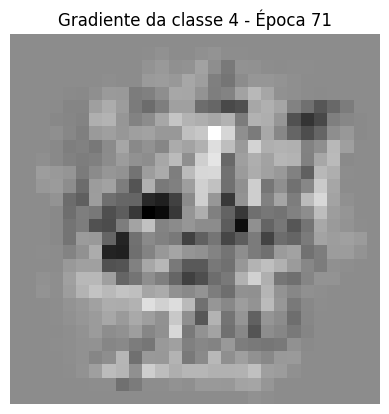

Epoch[71/100], Loss: 0.145230, Accuracy: 0.9760


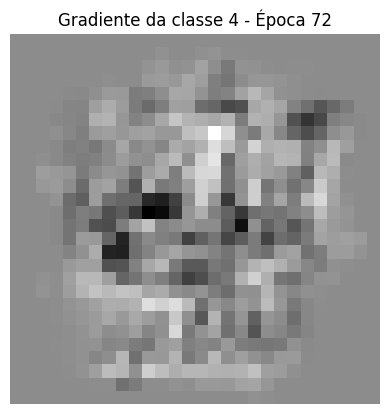

Epoch[72/100], Loss: 0.144839, Accuracy: 0.9760


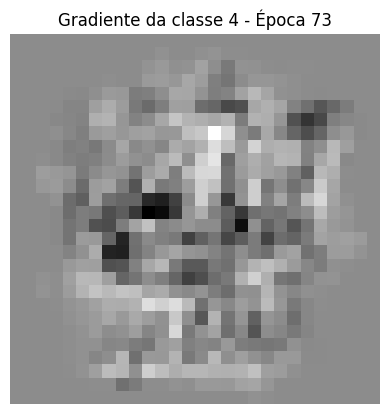

Epoch[73/100], Loss: 0.144450, Accuracy: 0.9760


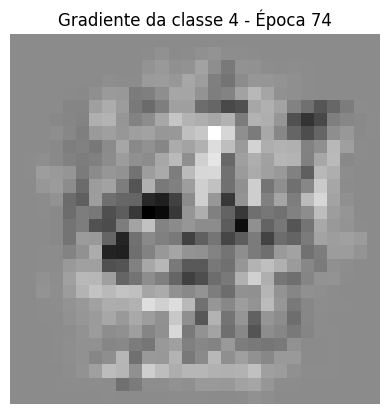

Epoch[74/100], Loss: 0.144062, Accuracy: 0.9760


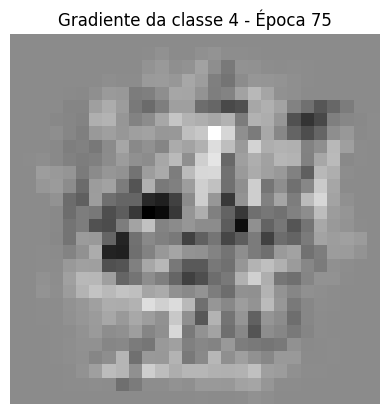

Epoch[75/100], Loss: 0.143677, Accuracy: 0.9760


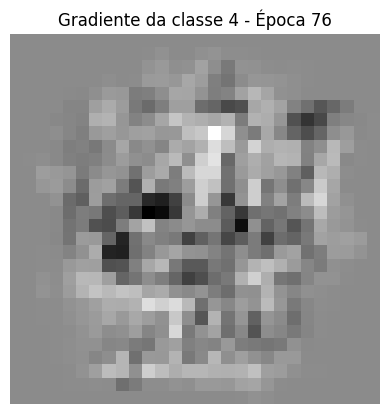

Epoch[76/100], Loss: 0.143293, Accuracy: 0.9760


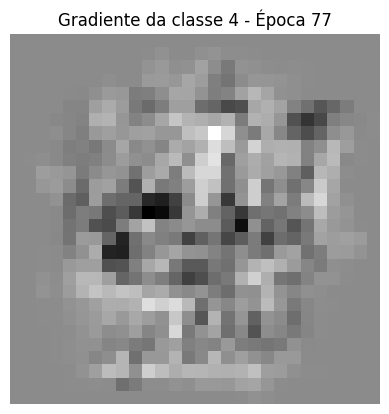

Epoch[77/100], Loss: 0.142911, Accuracy: 0.9760


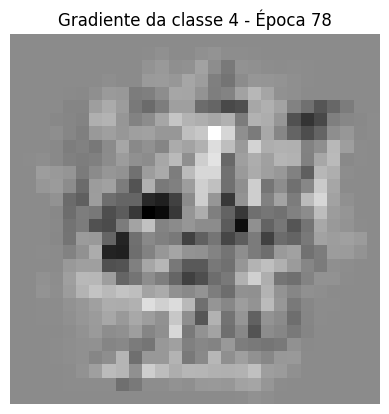

Epoch[78/100], Loss: 0.142531, Accuracy: 0.9760


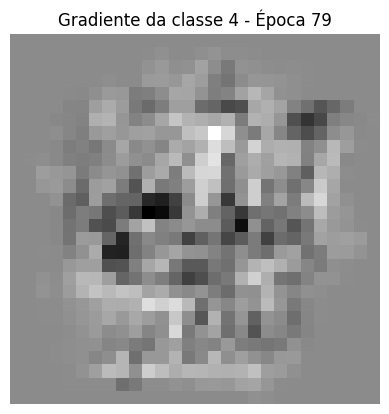

Epoch[79/100], Loss: 0.142153, Accuracy: 0.9760


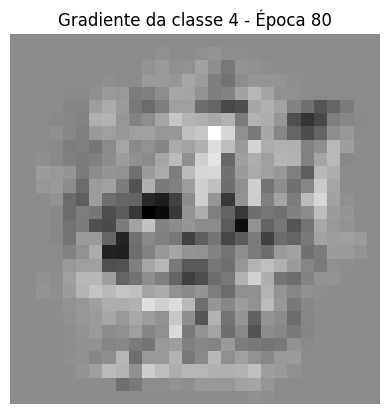

Epoch[80/100], Loss: 0.141776, Accuracy: 0.9760


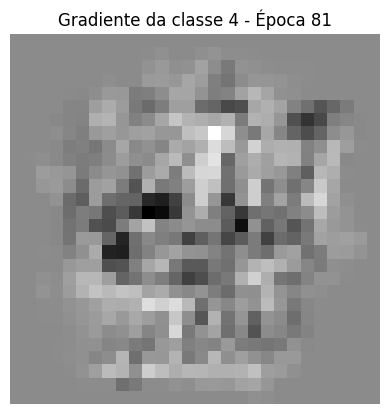

Epoch[81/100], Loss: 0.141402, Accuracy: 0.9760


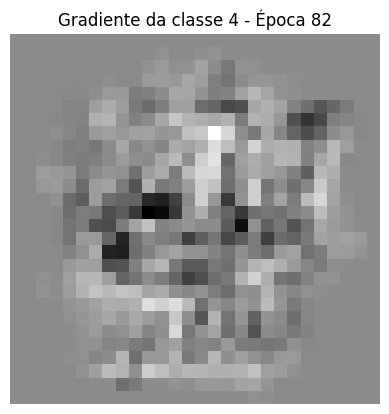

Epoch[82/100], Loss: 0.141029, Accuracy: 0.9760


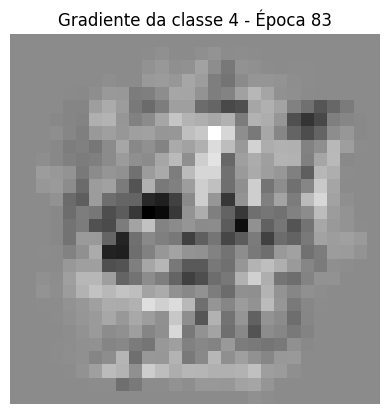

Epoch[83/100], Loss: 0.140658, Accuracy: 0.9760


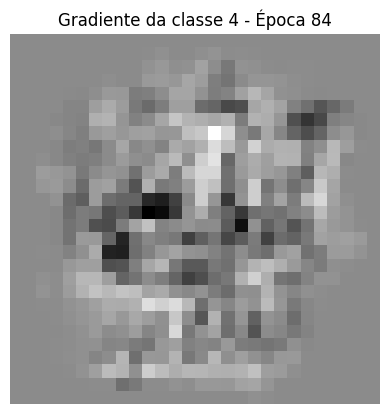

Epoch[84/100], Loss: 0.140289, Accuracy: 0.9760


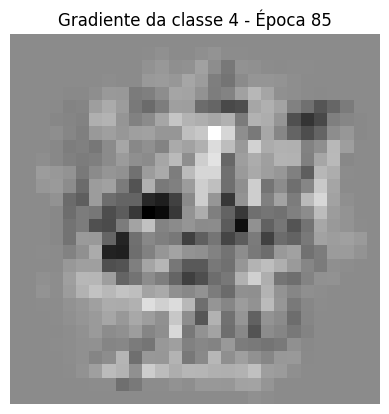

Epoch[85/100], Loss: 0.139921, Accuracy: 0.9760


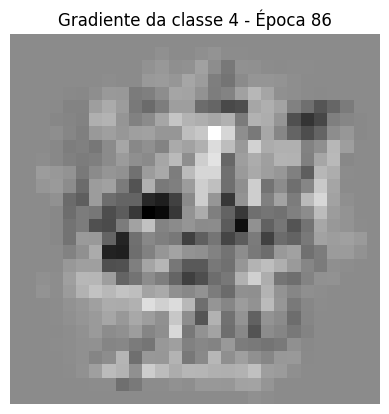

Epoch[86/100], Loss: 0.139555, Accuracy: 0.9760


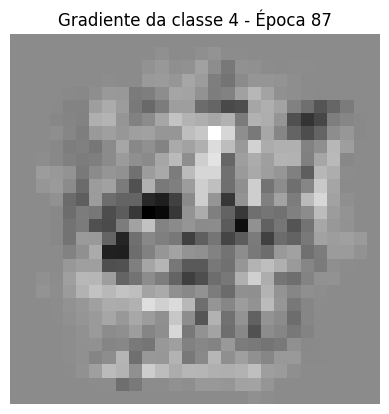

Epoch[87/100], Loss: 0.139191, Accuracy: 0.9760


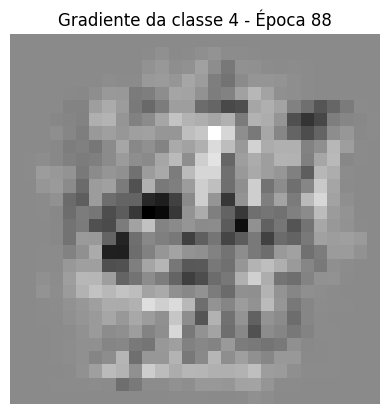

Epoch[88/100], Loss: 0.138829, Accuracy: 0.9760


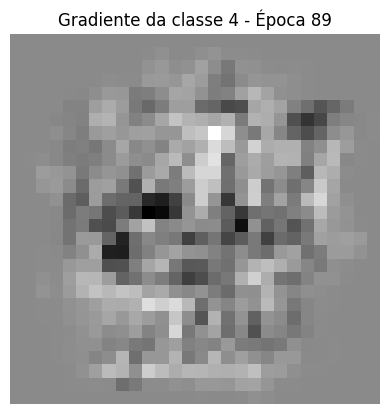

Epoch[89/100], Loss: 0.138468, Accuracy: 0.9760


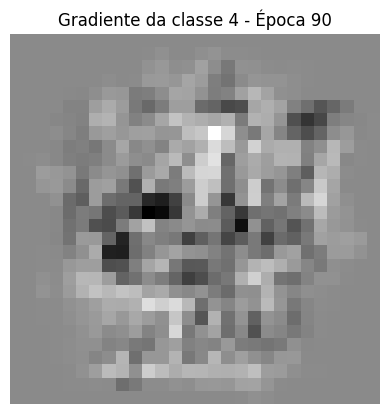

Epoch[90/100], Loss: 0.138110, Accuracy: 0.9760


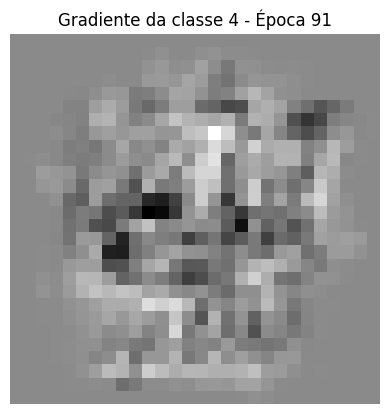

Epoch[91/100], Loss: 0.137752, Accuracy: 0.9760


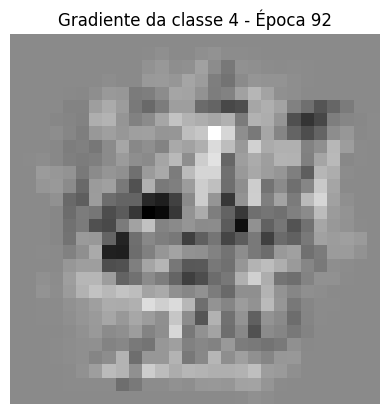

Epoch[92/100], Loss: 0.137397, Accuracy: 0.9760


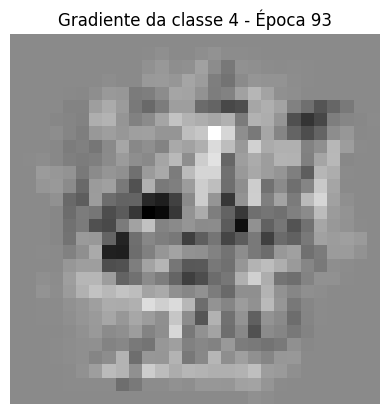

Epoch[93/100], Loss: 0.137043, Accuracy: 0.9760


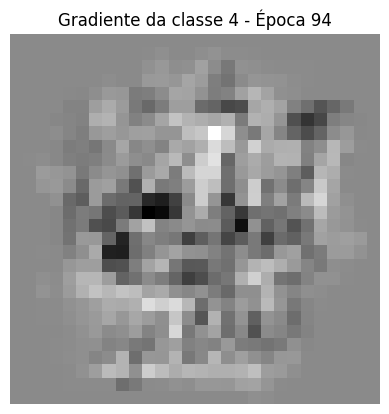

Epoch[94/100], Loss: 0.136691, Accuracy: 0.9760


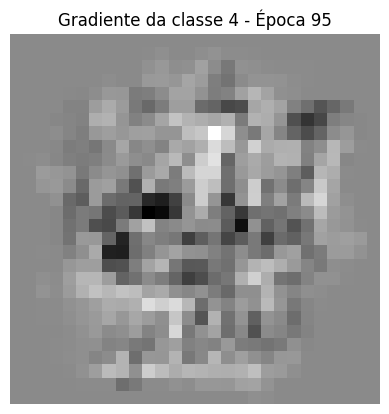

Epoch[95/100], Loss: 0.136340, Accuracy: 0.9760


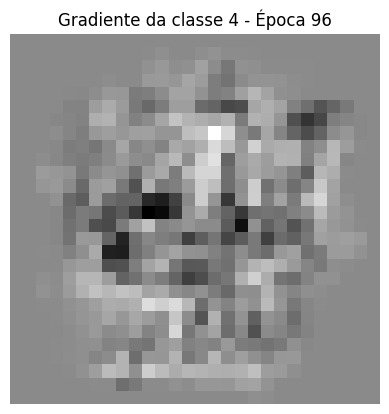

Epoch[96/100], Loss: 0.135991, Accuracy: 0.9760


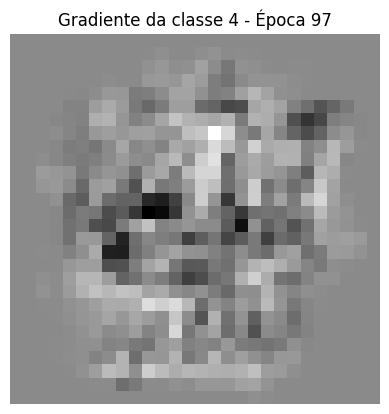

Epoch[97/100], Loss: 0.135643, Accuracy: 0.9760


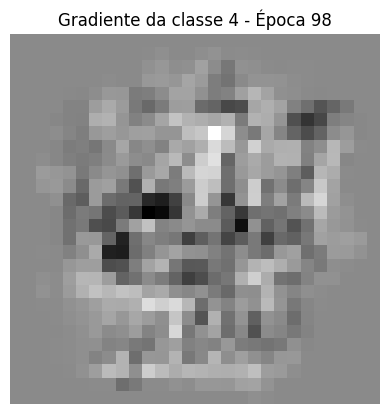

Epoch[98/100], Loss: 0.135298, Accuracy: 0.9760


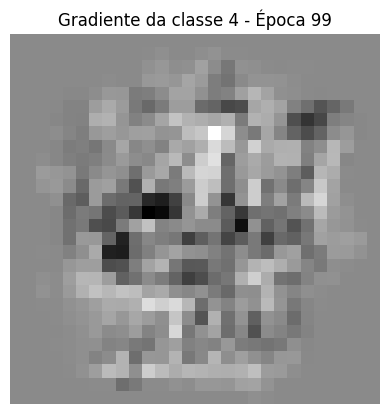

Epoch[99/100], Loss: 0.134953, Accuracy: 0.9760


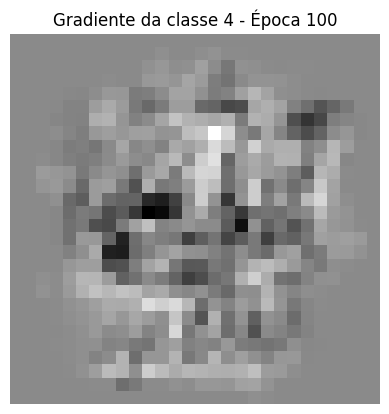

Epoch[100/100], Loss: 0.134611, Accuracy: 0.9760


In [24]:
# RESOLUÇÃO DOS EXERCICIOS 1 E 2

import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()

    # Visualizar gradientes da classe 4
    grad_4 = model.weight.grad[4].view(28, 28).detach().numpy()
    plt.imshow(grad_4, cmap='gray')
    plt.title(f'Gradiente da classe 4 - Época {i+1}')
    plt.axis('off')
    plt.show()

    optimizer.step()

    # Salva a perda da época
    losses.append(loss.item())

    # Calcular acurácia
    _, predicts = torch.max(outputs, 1)
    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()

    # Impressão por época
    print('Epoch[{}/{}], Loss: {:.6f}, Accuracy: {:.4f}'.format(i+1, epochs, loss.item(), accuracy))

In [25]:
print('Final loss:', loss.item())

Final loss: 0.13461080193519592


### Visualizando gráfico de perda durante o treinamento

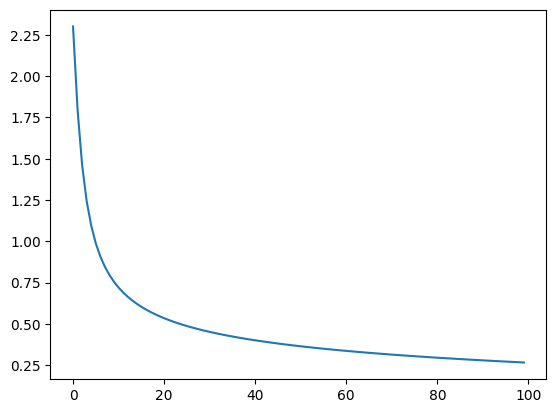

In [17]:
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [18]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.945


### Matriz de confusão com dados de treinamento e teste

In [19]:
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

Matriz de confusão:


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,96,0,1,0,0,0,1,0,0,2
1,0,111,1,0,0,0,2,2,1,0
2,0,0,91,1,0,1,1,1,1,1
3,0,0,0,88,0,2,0,0,0,0
4,0,0,1,0,102,2,0,1,0,3
5,0,2,0,1,0,82,0,0,2,1
6,1,0,1,1,2,2,90,0,0,0
7,0,1,1,1,0,0,0,112,0,3
8,0,2,2,0,0,1,0,0,83,0


## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

weights: torch.Size([10, 784])
bias:    torch.Size([10])


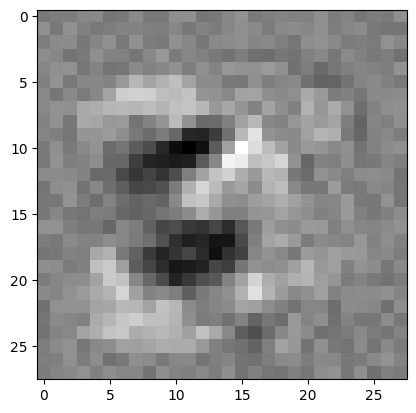

In [20]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 3
plt.imshow(weights[3, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

### Visualizando os pesos de todas as classes

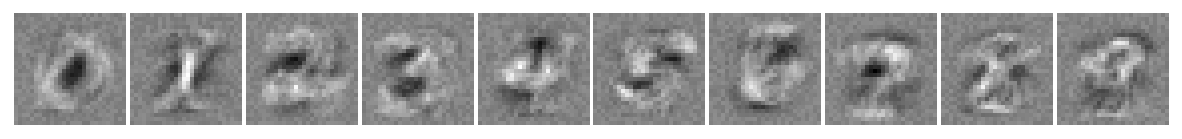

In [21]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmaxArgmaxNMIST.png)

# Atividades

## Exercícios

- 1) Insira código no laço do treinamento para que no final de cada época,
     seja impresso: o número da época e a perda e a acurácia

- 2) Insira código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

<details>
<summary>Mostrar Resultado</summary>

```python
losses = []
import numpy

import numpy
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)
    
    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    
    _, predicts = torch.max(outputs, 1)
    
    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()
    
    print('Epoch[{}/{}], loss: {:.6f}, acc: {:.6f}'
              .format(i+1, epochs, loss.data, accuracy))
    
    weights = model.state_dict()['weight']
    print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    print('bias:   ', bias.shape)

    # Visualizando pesos da classe 3
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()
```

</details>

## Perguntas

1. Qual é o shape da matriz de entrada na rede?
2. Qual é o shape da saída da rede?
3. Qual é o número total de parâmetros da rede, incluindo o bias?

# Aprendizados

* No laço de treinamento, aprendemos a monitorar o desempenho da rede por meio da perda (loss) e acurácia a cada época, o que é essencial para entender se o modelo está aprendendo corretamente.

* A visualização dos gradientes da classe 4 nos permitiu observar diretamente como os pesos estão sendo ajustados para reconhecer esse dígito específico — um passo muito importante para quem está aprendendo sobre backpropagation e interpretação de modelos.

* A função criterion (neste caso, CrossEntropyLoss) foi usada como função de custo, sendo o guia de atualização dos pesos via gradiente descendente.